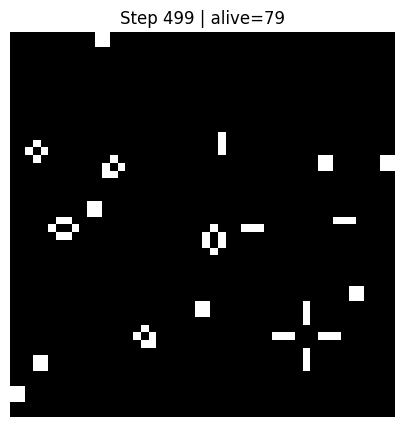

In [4]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
import numpy as np


def init_grid(rows: int = 50, cols: int = 50, p_alive: float = 0.25) -> np.ndarray:
    return np.random.choice([0, 1], size=(rows, cols), p=[1 - p_alive, p_alive]).astype(np.uint8)


def life_step(grid: np.ndarray) -> np.ndarray:
    rows, cols = grid.shape
    new_grid = np.zeros_like(grid, dtype=np.uint8)

    for r in range(rows):
        for c in range(cols):
            alive_neighbors = 0
            for dr in (-1, 0, 1):
                for dc in (-1, 0, 1):
                    if dr == 0 and dc == 0:
                        continue
                    rr, cc = r + dr, c + dc
                    if 0 <= rr < rows and 0 <= cc < cols:
                        alive_neighbors += grid[rr, cc]

            if grid[r, c] == 1:
                if alive_neighbors in (2, 3):
                    new_grid[r, c] = 1
            else:
                if alive_neighbors == 3:
                    new_grid[r, c] = 1
    return new_grid


def life_step(grid: np.ndarray) -> np.ndarray:
    rows, cols = grid.shape
    new_grid = np.zeros_like(grid, dtype=np.uint8)

    for r in range(rows):
        for c in range(cols):
            alive_neighbors = 0
            for dr in (-1, 0, 1):
                for dc in (-1, 0, 1):
                    if dr == 0 and dc == 0:
                        continue
                    rr, cc = r + dr, c + dc
                    if 0 <= rr < rows and 0 <= cc < cols:
                        alive_neighbors += grid[rr, cc]

            if grid[r, c] == 1:
                if alive_neighbors in (2, 3):
                    new_grid[r, c] = 1
            else:
                if alive_neighbors == 3:
                    new_grid[r, c] = 1
    return new_grid


def run_until_stable(start_grid: np.ndarray, max_steps: int = 2000):

    grid = start_grid.copy()
    steps = 0
    while steps < max_steps:
        nxt = life_step(grid)
        steps += 1
        if np.array_equal(nxt, grid):      
            return nxt, steps, False
        grid = nxt
    return grid, steps, True


def animate(grid: np.ndarray, max_frames: int = 500, delay: float = 0.4, show_grid: bool = False):
    for t in range(max_frames):
        plt.figure(figsize=(5, 5))
        plt.imshow(grid, cmap="gray", vmin=0, vmax=1, interpolation="nearest")
        plt.title(f"Step {t} | alive={int(grid.sum())}")
        plt.axis("off")

        if show_grid:
            ny, nx = grid.shape
            ax = plt.gca()
            ax.set_xticks(np.arange(-.5, nx, 1), minor=True)
            ax.set_yticks(np.arange(-.5, ny, 1), minor=True)
            ax.grid(which='minor', color='#cccccc', linewidth=0.5)

        display(plt.gcf())
        plt.close()  
        clear_output(wait=True)
        time.sleep(delay)

        new_grid = life_step(grid)
        if np.array_equal(new_grid, grid):
            print(
                f"Stopped at step {t}: stable configuration reached after {t+1} steps.")
            break
        grid = new_grid.copy()

start = init_grid(rows=50, cols=50, p_alive=0.25)
animate(start, max_frames=500, delay=0.01, show_grid=True)